In [4]:

import pandas as pd
import pyodbc

In [5]:
sql_conn = pyodbc.connect(Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='.\sqlexpress',
    Database='project') 

In [6]:
query = "SELECT Province.provName, DATENAME(YEAR,CONVERT(datetime, covid_stats.date_report,105)) + '_' +DATENAME(QUARTER,CONVERT(datetime, covid_stats.date_report,105)) AS [YrQtr] ,  SUM(covid_stats.cases) AS [TotalCases] FROM  Province  join covid_stats  ON covid_stats.provCode = Province.provCode WHERE covid_stats.provCode = 'ON' GROUP BY Province.provName,DATENAME(YEAR,CONVERT(datetime, covid_stats.date_report,105)) +'_' +DATENAME(QUARTER,CONVERT(datetime, covid_stats.date_report,105))"

df = pd.read_sql(query, sql_conn)

In [7]:
df

,provName,YrQtr,TotalCases
0,Ontario,2020_1,1964
1,Ontario,2020_2,34849
2,Ontario,2020_3,17064
3,Ontario,2020_4,132346
4,Ontario,2021_1,169541
5,Ontario,2021_2,195446
6,Ontario,2021_3,41542
7,Ontario,2021_4,180435
8,Ontario,2022_1,403915
9,Ontario,2022_2,12030


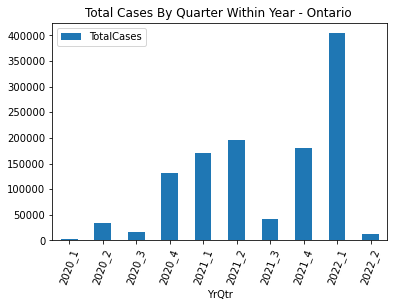

In [8]:
df.plot.bar(x="YrQtr", rot=70, title="Total Cases By Quarter Within Year - Ontario ");